<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex2_1_ann_mnist_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


11493376/11490434 [==============================] - 0s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 49us/sample - loss: 0.3859 - accuracy: 0.8947 - val_loss: 0.1978 - val_accuracy: 0.9474
Epoch 2/15
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1757 - accuracy: 0.9504 - val_loss: 0.1542 - val_accuracy: 0.9574
Epoch 3/15
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1307 - accuracy: 0.9620 - val_loss: 0.1320 - val_accuracy: 0.9620
Epoch 4/15
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1045 - accuracy: 0.9700 - val_loss: 0.1180 - val_accuracy: 0.9656
Epoch 5/15
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0863 - accuracy: 0.9756 - val_loss: 0.1124 - val_accuracy: 0.9671
Epoch 6/15
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0735 - accuracy: 0.9791 - val_loss: 0.1000 - val_accuracy

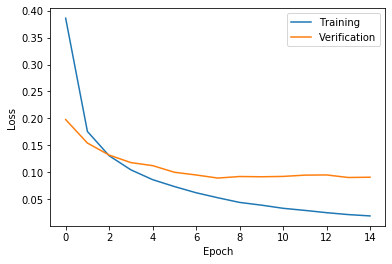

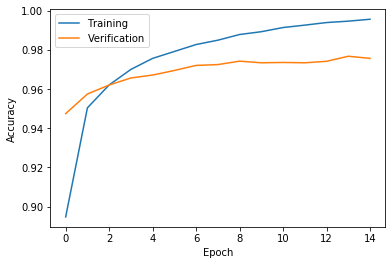

In [2]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])
        

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = keras.utils.to_categorical(y_train)
    Y_test = keras.utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()
        

def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


if __name__ == '__main__':
    main()